['I', 'like', 'go', 'to', 'by', 'dog', 'cat', 'school', 'bus', 'work', 'subway']
[[ 0.01543278  0.08505254]
 [ 0.14974654  0.12537156]
 [-0.08799631  0.05217764]
 [ 0.23700589  0.16724916]
 [-0.04954216 -0.07228141]
 [-0.24781796 -0.04430067]
 [ 0.1092858  -0.10127689]
 [ 0.19048561 -0.21589601]
 [-0.17807962  0.11068833]
 [ 0.19567503 -0.03791449]
 [ 0.19910036  0.05113211]]
<class 'numpy.ndarray'>


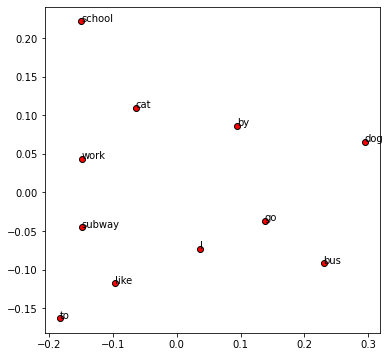

In [5]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA#用降维的应该能画多维的距离关系了
import pandas as pd
model = Word2Vec.load("./testmodel.bin")

def draw(model, sample):
    words = model.wv.index_to_key
    print(words)#词袋里的词
    
    word_vectors = np.array([model.wv[w] for w in words])
    print(word_vectors)#词向量
    print(type(model.wv['I']))

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x, y, word)

draw(model, sample=5)

In [14]:



#V2
emb = (
    pd.DataFrame(
        [model.wv.get_vector(str(n)) for n in model.wv.key_to_index],
        index = model.wv.key_to_index
    )
)

In [15]:
print(emb.head())

             0         1
I     0.015433  0.085053
like  0.149747  0.125372
dog  -0.247818 -0.044301
cat   0.109286 -0.101277
go   -0.087996  0.052178


[]

<Figure size 432x288 with 0 Axes>

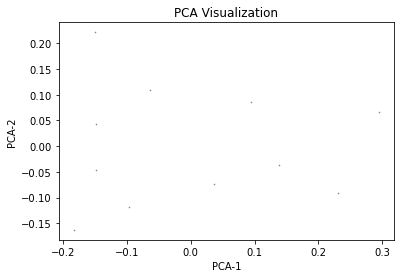

In [16]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()
